<a href="https://colab.research.google.com/github/atrinasalsabilnengkoda/PCVK_Genap_2021/blob/main/LeafImages2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
# karena diharuskan untuk membagi dataset maka saya mencoba untuk mengimport data dari local
from google.colab import files
files.upload()

Saving images.zip to images (2).zip


{'images.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xa1@\xc3R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x00\x00\x00images/train/PK\x03\x04\x14\x00\x00\x00\x00\x005B\xc3R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00\x00images/train/Acer_Campestre/PK\x03\x04\x14\x00\x00\x00\x08\x00\x10\x00%@[\xc5f$\xd1|\x00\x00\xe6"\x01\x004\x00\x00\x00images/train/Acer_Campestre/Acer_Campestre_01.ab.jpg\xec\x9by\\\x13\xd7\xf6\xc0\x87M\x14\nX\x11Q\x10\x82ZI\x151\xf5\xb1Y\x84\xe4iKQP\xa9\x1b \x08SEe+M\xad"\x88!\xf3\x14\x11\x14%Uji\xb5\x90\x16\x10D\x84 \x8b\x14D\xc2j\xaa\x14\x83\x04\x12\x85\x9a\xb5Od33\xb2\x8dd2\xf3\xc6.\x9f\xf7_\xfb~-\xfa\xe9\xfb\xbdL\x96Ifn\xbe\xe7\xdes\xe6\x9e{NNB< \xe4\xc0l\xbf\xf76\xbc\x07\xe8\xe9\xe9\x01\xeb\xc9\x1b@\xf4\x01\xef\xbcx\xf7\xbb\x9b\xbe>\xf9\xf8i\xff\xcb\xf6\xefW\xfaD#`:S\x7f\xbf>\xa2\xa7\xf7:@\xb4\x02\x14\x00\xd03\xfa\xf9c\xc0/\x9b\x9e\xbe\x81\xa1\xd1\x0c\xe3\x99\xb3LL\xc9\x06\xd5\xb3\x01}=\x03\x03}C\x03##CC\xf2l2y\x1e0|\xddh\xce\xa2UkgXn\xd9m\xbc

In [65]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_directory = '/tmp/images'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'val')

In [66]:
os.listdir('/tmp/images/train')

['Acer_Saccharinum', 'Acer_Campestre', 'Alnus_Cordata']

In [67]:
os.listdir('/tmp/images/val')

['Acer_Saccharinum', 'Acer_Campestre', 'Alnus_Cordata']

In [68]:
# membuat direktori Acer_Campestre pada direktori data training
train_Acer_Campestre_directory = os.path.join(train_directory, 'Acer_Campestre')
 
# membuat direktori Acer_Saccharinum pada direktori data training
train_Acer_Saccharinum_directory = os.path.join(train_directory, 'Acer_Saccharinum')

# membuat direktori Alnus_Cordata pada direktori data training
train_Alnus_Cordata_directory = os.path.join(train_directory, 'Alnus_Cordata')

# membuat direktori Acer_Campestre pada direktori data validasi
validation_Acer_Campestre_directory = os.path.join(validation_directory, 'Acer_Campestre')
 
# membuat direktori Acer_Saccharinum pada direktori data validasi
validation_Acer_Saccharinum_directory = os.path.join(validation_directory, 'Acer_Saccharinum')

# membuat direktori Alnus_Cordata pada direktori data validasi
validation_Alnus_Cordata_directory = os.path.join(validation_directory, 'Alnus_Cordata')

In [69]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [70]:
train_generator = train_datagen.flow_from_directory(
        train_directory,  # direktori data latih
        target_size=(152, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 36 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [72]:
history = model.fit(
    train_generator, 
    epochs=16, 
    steps_per_epoch=len(train_generator), 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=len(validation_generator))

Epoch 1/16
9/9 [==============================] - 2s 206ms/step - loss: 1.6863 - accuracy: 0.3056 - val_loss: 1.0550 - val_accuracy: 0.6667
Epoch 2/16
9/9 [==============================] - 2s 188ms/step - loss: 0.9445 - accuracy: 0.5833 - val_loss: 0.7927 - val_accuracy: 0.4167
Epoch 3/16
9/9 [==============================] - 2s 191ms/step - loss: 0.5440 - accuracy: 0.7222 - val_loss: 0.3716 - val_accuracy: 0.7500
Epoch 4/16
9/9 [==============================] - 2s 187ms/step - loss: 0.5338 - accuracy: 0.8333 - val_loss: 0.1873 - val_accuracy: 1.0000
Epoch 5/16
9/9 [==============================] - 2s 189ms/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.6542 - val_accuracy: 0.6667
Epoch 6/16
9/9 [==============================] - 2s 190ms/step - loss: 0.1325 - accuracy: 0.9722 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 7/16
9/9 [==============================] - 2s 192ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 5.7506e-04 - val_accuracy: 1.0000
Epoch 8/16
9/9 [

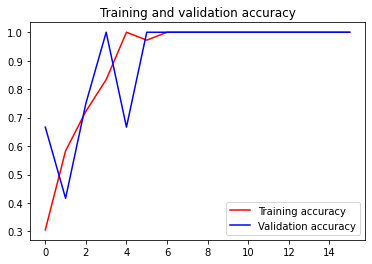

<Figure size 432x288 with 0 Axes>

In [73]:
#buat grafik akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

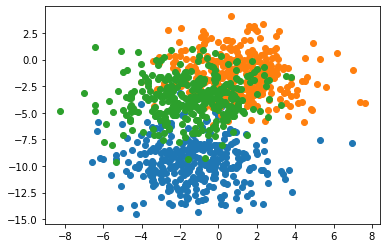

In [74]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Saving Acer_Saccharinum_06.ab.jpg to Acer_Saccharinum_06.ab (1).jpg
Acer_Saccharinum_06.ab.jpg
[[0. 1. 0.]]


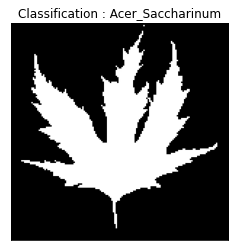

In [76]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  pict = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(pict)
  x = image.img_to_array(pict)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  
  if classes[0,0]!=0:
    plt.title('Classification : Acer_Campestre'), plt.xticks([]), plt.yticks([])
  elif classes[0,1]!=0:
    plt.title('Classification : Acer_Saccharinum'), plt.xticks([]), plt.yticks([])
  else :
    plt.title('Classification : Alnus_Cordata'), plt.xticks([]), plt.yticks([])